# <center> Communautés dans un réseau </center>
<center> SAE 1.02 / 2024 - 25 </center>


<center> programmes suivants <strong>indispensables</strong> au fonctionnement de chaque comparaison <center>

In [9]:
from time import time
from matplotlib.pyplot import plot, show, legend, xlabel, ylabel

In [10]:
#Fichiers .csv utilisés pour comparer les temps d'exécutions des fonctions

reseaux=[]
def lecture_reseau(path):      #fonction provenant de la SAE 1.01
    f_in=open(path,encoding='utf-8', mode ='r')
    
    amis=[]
    li=f_in.readline()
    li=li.strip()
    while li!='':
        tab_li=li.split(';')
        amis.append(tab_li[0])
        amis.append(tab_li[1])
        li=f_in.readline()
        li=li.strip()
    f_in.close()
    return amis


reseaux.append(lecture_reseau('file/Communaute1.csv'))
reseaux.append(lecture_reseau('file/Communaute2.csv'))
reseaux.append(lecture_reseau('file/Communaute3.csv'))
reseaux.append(lecture_reseau('file/Communaute4.csv'))

#définition du tableau des tailles de chaque fichier

taille_tableau=[] #tableau accueillant la taille de chaque fichier

for i in range(len(reseaux)):                    #boucle ajoutant la taille de chaque fichier à taille_tableau
    taille_tableau.append(len(reseaux[i]))    


**2.** Comparer **théoriquement** et **pratiquement** les fonctions cree_reseau et dico_reseau. (Cette dernière construit le réseau en cherchant d'abord les amis d'Alice, puis de Bob, etc.)

In [29]:
#fonctions provenant de la SAE 1.01
def personnes(amis):
    """
    retourne le tableau des différentes personnes du tableau amis
    """
    personnes=[]                         
    i=0                                
    while i<len(amis):                      
        if amis[i] not in personnes:               
            personnes.append(amis[i])             
        i+=1                                      
    return personnes

def ses_amis(amis, prenom):
    """
    Retourne le tableau des amis de prenom
    """
    ses_amis=[]
    i=0
    while i<len(amis)/2:
        if amis[2*i]== prenom :
            ses_amis.append(amis[2*i+1])
        elif amis[2*i+1]==prenom :
            ses_amis.append(amis[2*i])
        i+=1
    return ses_amis


#version non optimisée 
def dico_reseau(amis):
    reseau={}
    # membres du réseau 
    pers=personnes(amis)
    # construction du dictionnaire
    i=0
    while i<len(pers):
        reseau[pers[i]]=ses_amis(amis,pers[i])
        i+=1
    return reseau


In [30]:

def cree_reseau(liste):
    """
    Créer un dictionnaire d'amitié à partir d'une liste.
    Chaque couple représente une interaction d'amitié entre deux personnes
    Le réseau est représenté sous forme de dictionnaire où les clés sont les noms des personnes,
    et les valeurs sont les listes de leurs amis.
    """
    dico={}    #Crée un ditionnaire vide
    for a in range(len(liste)//2):  #Si la pemière personne du couple n'est pas dans le réseau, on l'ajoute en tant que clé dans le dico
        if liste[a*2] not in dico:
            dico[liste[a*2]]=[]
       
        if liste[a*2+1] not in dico:  #Si la deuxième personne du couple n'est pas dans le réseau, on l'ajoute en tant que clé dans le dico
            dico[liste[a*2+1]]=[]
       
        if liste[a*2] not in dico[liste[a*+1]]:   #Ajout des amis dans leur listes
            dico[liste[a*2]].append(liste[a*2+1])
            dico[liste[a*2+1]].append(liste[a*2])
        
        if liste[a*2+1] not in dico[liste[a*2]]:   #Ajout des amis dans leur listes
            dico[liste[a*2+1]].append(liste[a*2])
            dico[liste[a*2]].append(liste[a*2+1])
       
    return dico
       

<center><strong> Dans un premier temps, on va s'intéresser à une comparaison théorique. </strong><center>


La fonction dico_réseau utilise des fonctions auxiliaires, personnes et ses_amis.
Regardons de plus près ce que fait chaque fonction pour déterminer la complexité théorique de dico_reseau :


la fonction personnes parcours le tableau d'amis en entier ce qui implique une complexité linéaire O(n) ou n est la taille du tableau d'amis. Mais la vérification if amis[i] not in personnes parcoure dans le pire des cas tout le tableau personnes. On a donc des boucles imbriquées qui impliquent une complexité quadratique O(n²) pour la fonction personnes.
A cela s'ajoute la fonction ses_amis qui parcours la moitié du tableau d'amis. On peut dire que sa complexité est linéaire soit O(n).

La fonction dico_reseau appelle une fois la fonction personnes : on reste donc sur O(n²). La fonction ses_amis O(n) est appelée k fois ou k est le nombre de membres du tableau d'amis (renvoyé par la fonction personnes). Dans le pire des cas, la fonction ses_amis est appelée n fois ce qui veut dire qu'on parcoure n fois le tableau d'amis. On se retrouverait donc avec une complexité quadratique O(n²) lors de l'appel de la fonction ses_amis dans la boucle. 
Au final, on a une complexité asymptotique quadratique pour la foncion dico_reseau.


En ce qui concerne la fonction cree_reseau, on a une seule boucle qui compose la fonction.On a une complexité linéaire avec la boucle principal.
Au final, la fonction cree_reseau est linéaire.


<center><strong> Intéressons-nous à la comparaison pratique de ces deux fonctions. <strong><center>

In [41]:
#boucle calculant le temps d'exécution de dico_reseau et cree_reseau pour chaque fichier

temps_dico_reseau=[]
temps_cree_reseau=[]
 
for i in reseaux:                  
    tic=time()
    dico_reseau(i)
    tac=time()
    temps_dico_reseau.append(round((tac-tic),3))  
    
    tic=time()
    cree_reseau(i)
    tac=time()
    temps_cree_reseau.append(round(1000*(tac-tic),3))

<strong> Affichage des courbes </strong>

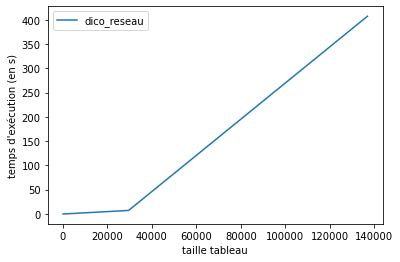

In [39]:
#affichage de la courbe de la fonction dico_reseau
%matplotlib inline

plot(taille_tableau, temps_dico_reseau, label="dico_reseau")

xlabel("taille tableau")
ylabel("temps d'exécution (en s)")
legend()

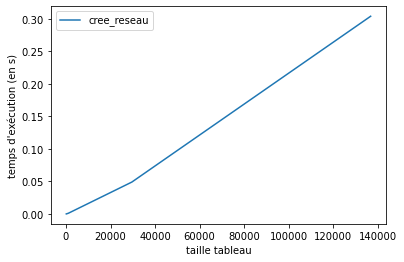

In [40]:
#affichage de la courbe de la fonction cree_reseau
%matplotlib inline

plot(taille_tableau, temps_cree_reseau, label="cree_reseau")

xlabel("taille tableau")
ylabel("temps d'exécution (en ms)")
legend()


On remarque que la fonction cree_reseau est beaucoup plus rapide que dico_reseau. En effet, n'ayant pas recours à plusieurs fonctions auxiliares et en parcourant qu'une fois le tableau d'amis, la fonction cree_reseau est plus performante.
 

**11.** Comparer **théoriquement** et **pratiquement** les fonctions comu_dans_reseau et comu_dans_amis appliquée à une personne des plus populaires (la recherche de la personne la plus populaire sera prise en compte dans la complexité).

In [12]:
#fonctions auxiliaires à comu_dans_reseau et comu_dans_amis
def sont_amis(reseau,a,b):
    """
    Vérifier si deux personnes sont amies dans le réseau.
    Prend en entrée le réseau, ainsi que les noms des deux personnes.
    Retourne True si elles sont amies, sinon False.
    """
    #Vérifie si 'b' est dans la liste des amis de 'a'
    return (b in reseau[a])

def sont_amis_de(a,groupe,reseau):
    """
    Vérifier si une personne est amie avec tous les membres d'un groupe.
    Prend en entrée le nom de la personne, un groupe de personnes, et le réseau.
    Retourne True si la personne est amie avec chaque membre du groupe, sinon False.
    """
    for i in groupe:        #Vérifie si 'a' est ami avec tous les membres du groupe
        if not sont_amis(reseau,a,i):
            return False      #Si une personne n'est pas amie, retourne False
    return True       #Sinon, retourne True
    
def comu(groupe,reseau):
    """
    Construire une communauté à partir d'un groupe de personnes et d'un réseau.
    Ajoute successivement des personnes à la communauté si elles sont amies avec tous ses membres.
    Retourne une liste représentant la communauté maximale trouvée.
    """
    #Initialise une communauté avec la première personne
    communaute=[groupe[0]]
  
    for pers in range(1,len(groupe)):        #Ajoute la personne si elle est amie avec tous les membres actuels de la communauté
        if sont_amis_de(groupe[pers],communaute,reseau):
            communaute.append(groupe[pers])
    return communaute         #Retourne la communauté maximale trouvée
    
def tri_insertion_desc(tab):
    """
    Fonction prend en paramètre un tableau et retourne le tableau trié dans l'ordre décroissant.
    Algorithme de tri par insertion.
    """
    for i in range(1, len(tab)):
        tmp = tab[i]
        j = i
        while j > 0 and tab[j - 1][0] < tmp[0]:
            tab[j] = tab[j - 1]
            j -= 1
        tab[j] = tmp
        
    return tab

def tri_popu(groupe, reseau):
    """
    Trier un groupe de personnes par popularité décroissante (nombre d'amis).
    Prend en entrée une liste de prénoms et le réseau.
    Retourne une liste triée des noms, de la personne la plus populaire à la moins populaire.
    """
    #Calcul du nombre d'amis pour chaque personne
    tab = []
    for personne in groupe:
        nb = len(reseau[personne])  #Nombre d'amis de la personne
        tab.append([nb, personne])  #Ajoute le couple Nombre d'amis et la personne
        
    #Tri de tab en fonction du Nombre d'amis
    tab_tri=tri_insertion_desc(tab)
    
    #Récupère uniquement les prénoms triés
    resultat = [personne for _, personne in tab_tri]
    
    return resultat  

   

In [15]:
#fonctions à comparer
def comu_dans_reseau(reseau):
    """
    Construire une communauté maximale en triant les membres du réseau par popularité décroissante.
    Prend en entrée le réseau sous forme de dictionnaire.
    Retourne une communauté maximale sous forme de liste.
    """
    #Trie les membres du groupe par popularité décroisante
    tab=tri_popu(reseau,reseau)
    return comu(tab,reseau)   #Retourne la comu

def comu_dans_amis(personne, reseau):
    """
    Construire une communauté maximale à partir d'une personne et de ses amis.
    Trie les amis de la personne par popularité décroissante et les ajoute successivement à la communauté.
    Prend en entrée le nom de la personne et le réseau.
    Retourne une liste représentant la communauté maximale formée.
    """
    # On commence avec la personne dans la communauté
    communaute=[personne]
    amis=tri_popu(reseau[personne],reseau)   #liste les amis de la personne triés par popularité décroissante
   
    for i in amis:              #ajoute les amis à la communnaute
        communaute.append(i) 
    communaute_finale=comu(communaute,reseau)   #détermine la communaute_final
    return communaute_finale        



<center><strong> Intéressons-nous à la comparaison théorique </strong><center>

Les fonctions comu_dans_amis et comu_dans_reseau sont très similaires. Elles utilisent les mêmes fonctions auxiliaires : tri_popu et comu.
Ces dernières ont toutes deux une complexité asymptotique quadratique. Donc, comu_dans_amis et comu_dans_reseau également. 
Pourtant on peut déjà remarqué que comu_dans_reseau est plus simple que son homologue qui utilise une boucle en plus qui a donc une complexité linéaire. 
Comu_dans_amis sera plus lent avec des réseaux de plus en plus grand.

<center><strong> Voyons maintenant la comparaison pratique. </strong><center>

In [27]:

dicos=[]
for i in reseaux:                    #liste des différents dictionnaires pour chaque réseau d'amitié des fichiers
    dicos.append(cree_reseau(i))

temps_comu_dans_amis=[]
temps_comu_dans_reseau=[]
 
for i in range(len(reseaux)):                  #boucle calculant temps d'exécution de dico_reseau et cree_reseau pour chaque fichier
    tic=time()
    personne=tri_popu(dicos[i],dicos[i])[0]
    comu_dans_amis(personne,dicos[i])
    tac=time()
    temps_comu_dans_amis.append(round((tac-tic),3))  
    
    tic=time()
    comu_dans_reseau(dicos[i])
    tac=time()
    temps_comu_dans_reseau.append(round((tac-tic),3))

<strong> Affichage des courbes </strong>

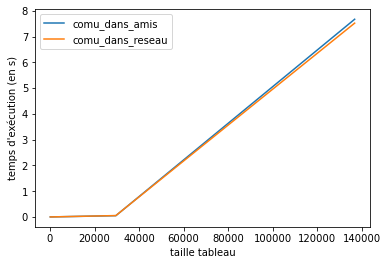

In [37]:
#affichage des courbes de la fonction comu_dans_amis et comu_dans_reseau
%matplotlib inline

plot(taille_tableau, temps_comu_dans_amis, label="comu_dans_amis")
plot(taille_tableau, temps_comu_dans_reseau, label="comu_dans_reseau")

xlabel("taille tableau")
ylabel("temps d'exécution (en s)")
legend()

Les deux fonctions ont une courbe représentative quadratique identique. Celle de comu_dans_reseau est légèrement moins croissante.